<a href="https://colab.research.google.com/github/bhoop70233/digit-recongizer-1/blob/main/MNIST_DIGIT_RECOGNIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Simple MNIST NN from scratch**¶
bold textIn this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
Y_train

array([5., 9., 6., 4., 4., 8., 4., 2., 5., 5., 0., 0., 1., 5., 2., 5., 2.,
       7., 0., 7., 0., 7., 5., 2., 6., 1., 9., 2., 3., 5., 9., 3., 4., 5.,
       6., 6., 8., 9., 4., 4., 1., 3., 6., 1., 7., 8., 5., 0., 3., 1., 5.,
       1., 6., 3., 5., 7., 1., 8., 0., 7., 8., 2., 9., 0., 5., 2., 8., 4.,
       6., 8., 4., 0., 3., 3., 6., 9., 0., 4., 9., 1., 3., 0., 7., 2., 2.,
       3., 4., 6., 7., 0., 9., 2., 7., 6., 7., 2., 6., 6., 4., 2., 7., 6.,
       0., 0., 4., 1., 1., 8., 5., 6., 1., 5., 8., 8., 0., 8., 1., 6., 6.,
       7., 0., 6., 0., 2., 9., 0., 0., 5., 5., 0., 3., 6., 7., 4., 1., 9.,
       7., 4., 4., 5., 7., 8.])

### Two-Layer Neural Network Architecture

#### Forward Propagation

1. **Input Layer (\( A[0] \))**:
    - **Shape**: \( 784 \times m \) (where \( m \) is the number of examples)
    - **Description**: Represents the flattened 28x28 input images.

2. **Hidden Layer (\( A[1] \))**:
    - **Weights (\( W[1] \))**:
        - **Shape**: \( 10 \times 784 \)
        - **Description**: Initialized randomly to transform 784 input features into 10 hidden units.
    - **Biases (\( b[1] \))**:
        - **Shape**: \( 10 \times 1 \)
        - **Description**: Initialized randomly to be added to the linear combination.
    - **Linear Combination (\( Z[1] \))**:
        - **Formula**: \( Z[1] = W[1]X + b[1] \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Computes the input to the activation function for the hidden layer.
    - **Activation (\( A[1] \))**:
        - **Formula**: \( A[1] = g_{\text{ReLU}}(Z[1]) \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Applies the ReLU activation function, which sets all negative values to zero.

3. **Output Layer (\( A[2] \))**:
    - **Weights (\( W[2] \))**:
        - **Shape**: \( 10 \times 10 \)
        - **Description**: Initialized randomly to transform 10 hidden units into 10 output units (one for each class).
    - **Biases (\( b[2] \))**:
        - **Shape**: \( 10 \times 1 \)
        - **Description**: Initialized randomly to be added to the linear combination.
    - **Linear Combination (\( Z[2] \))**:
        - **Formula**: \( Z[2] = W[2]A[1] + b[2] \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Computes the input to the activation function for the output layer.
    - **Activation (\( A[2] \))**:
        - **Formula**: \( A[2] = g_{\text{softmax}}(Z[2]) \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Applies the softmax activation function, which converts the output into probabilities summing to 1.

#### Backward Propagation

1. **Output Layer Gradients**:
    - **Gradient of \( Z[2] \) (\( dZ[2] \))**:
        - **Formula**: \( dZ[2] = A[2] - Y \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Computes the error for the output layer.
    - **Gradient of \( W[2] \) (\( dW[2] \))**:
        - **Formula**: \( dW[2] = \frac{1}{m} dZ[2] A[1]^T \)
        - **Shape**: \( 10 \times 10 \)
        - **Description**: Computes the gradient of the loss with respect to \( W[2] \).
    - **Gradient of \( b[2] \) (\( dB[2] \))**:
        - **Formula**: \( dB[2] = \frac{1}{m} \sum dZ[2] \)
        - **Shape**: \( 10 \times 1 \)
        - **Description**: Computes the gradient of the loss with respect to \( b[2] \).

2. **Hidden Layer Gradients**:
    - **Gradient of \( Z[1] \) (\( dZ[1] \))**:
        - **Formula**: \( dZ[1] = W[2]^T dZ[2] \odot g'_{\text{ReLU}}(Z[1]) \)
        - **Shape**: \( 10 \times m \)
        - **Description**: Computes the error for the hidden layer.
        - **Note**: \( g'_{\text{ReLU}}(z) \) is the derivative of the ReLU function, which is 1 for \( z > 0 \) and 0 otherwise.
    - **Gradient of \( W[1] \) (\( dW[1] \))**:
        - **Formula**: \( dW[1] = \frac{1}{m} dZ[1] A[0]^T \)
        - **Shape**: \( 10 \times 784 \)
        - **Description**: Computes the gradient of the loss with respect to \( W[1] \).
    - **Gradient of \( b[1] \) (\( dB[1] \))**:
        - **Formula**: \( dB[1] = \frac{1}{m} \sum dZ[1] \)
        - **Shape**: \( 10 \times 1 \)
        - **Description**: Computes the gradient of the loss with respect to \( b[1] \).

#### Parameter Updates

1. **Update Rule**:
    - **Weights and Biases for Output Layer**:
        - \( W[2] = W[2] - \alpha dW[2] \)
        - \( b[2] = b[2] - \alpha dB[2] \)
    - **Weights and Biases for Hidden Layer**:
        - \( W[1] = W[1] - \alpha dW[1] \)
        - \( b[1] = b[1] - \alpha dB[1] \)
    - **Description**: Updates the parameters using the gradients computed during backward propagation, where \( \alpha \) is the learning rate.

In [18]:
import numpy as np

# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax activation function
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of ReLU
def ReLU_deriv(Z):
    return Z > 0

# One-hot encoding
def one_hot(Y):
    Y = Y.astype(int)  # Ensure Y is of integer type
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 2 8 8 8 8 8 8 8 8 8 8 8 2 8 8 8 8 8 8 2 2 4 2 8 8 8 8 8 8 8 2 8 2 2 8
 2 8 2 2 8 2 9 8 8 8 8 8 9 8 2 2 8 2 8 2 2 2 8 2 9 8 2 2 9 2 8 8 8 8 8 8 8
 2 2 2 8 8 2 8 8 2 8 8 0 8 4 2 8 8 2 9 4 8 8 2 2 8 9 2 4 2 8 8 9 8 9 8 2 2
 4 9 8 8 8 2 2 8 8 2 2 8 8 8 2 8 8 8 2 8 2 9 8 9 2 8 2 8 0 8 8] [5. 9. 6. 4. 4. 8. 4. 2. 5. 5. 0. 0. 1. 5. 2. 5. 2. 7. 0. 7. 0. 7. 5. 2.
 6. 1. 9. 2. 3. 5. 9. 3. 4. 5. 6. 6. 8. 9. 4. 4. 1. 3. 6. 1. 7. 8. 5. 0.
 3. 1. 5. 1. 6. 3. 5. 7. 1. 8. 0. 7. 8. 2. 9. 0. 5. 2. 8. 4. 6. 8. 4. 0.
 3. 3. 6. 9. 0. 4. 9. 1. 3. 0. 7. 2. 2. 3. 4. 6. 7. 0. 9. 2. 7. 6. 7. 2.
 6. 6. 4. 2. 7. 6. 0. 0. 4. 1. 1. 8. 5. 6. 1. 5. 8. 8. 0. 8. 1. 6. 6. 7.
 0. 6. 0. 2. 9. 0. 0. 5. 5. 0. 3. 6. 7. 4. 1. 9. 7. 4. 4. 5. 7. 8.]
0.06338028169014084
Iteration:  10
[1 7 7 5 5 8 5 5 5 7 5 5 8 8 4 9 5 5 7 5 5 9 2 4 2 8 5 2 7 8 0 5 2 8 9 2 5
 2 5 2 2 7 6 1 7 8 8 5 5 9 8 2 2 8 7 5 1 2 2 5 5 9 5 2 2 6 2 5 8 8 5 5 9 9
 7 2 5 9 4 9 7 5 2 8 8 0 5 7 7 1 2 2 4 7 4 7 2 6 8 9 2 5 5 5 2 9 9 9 8 5 2
 7 9

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5.0


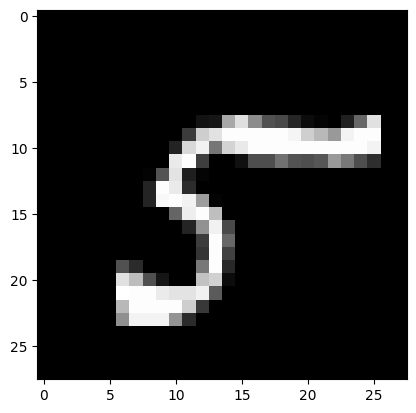

Prediction:  [9]
Label:  9.0


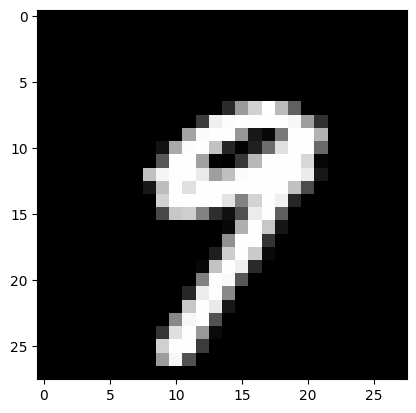

Prediction:  [6]
Label:  6.0


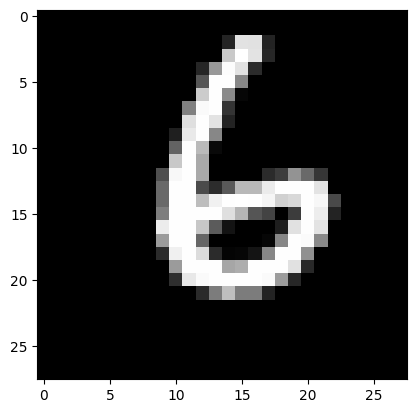

Prediction:  [4]
Label:  4.0


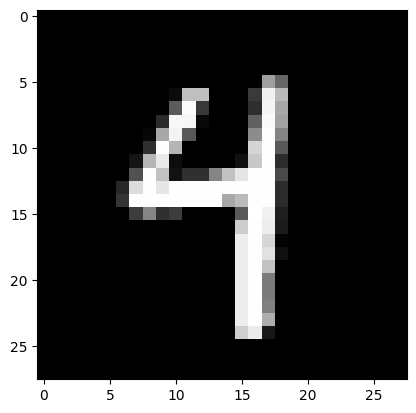

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 6 0 4 0 7 6 7 5 0 1 3 5 9 1 5 1 6 2 1 6 9 2 7 9 4 3 9 9 1 2 2 4 4 8 1 0
 4 3 9 3 0 2 9 0 4 5 4 7 4 6 7 7 7 1 7 2 7 5 5 9 1 6 9 9 7 8 3 8 0 3 6 0 4
 9 8 2 2 0 0 2 8 5 1 2 0 8 6 6 9 7 1 4 2 2 8 3 9 6 7 9 2 4 8 1 8 1 5 6 0 9
 5 8 8 6 8 0 7 9 5 5 3 1 1 3 2 4 2 2 6 1 3 9 8 8 4 7 9 6 6 4 1 6 5 7 1 7 1
 8 8 3 5 5 5 1 1 2 8 0 0 1 8 4 3 5 8 4 8 0 8 4 0 8 1 6 7 2 8 5 4 1 0 7 6 9
 0 5 0 4 3 2 9 6 4 4 1 8 3 1 4 6 5 2 6 0 1 6 2 0 6 2 1 0 4 9 0 3 3 7 6 5 6
 0 4 9 6 2 4 5 5 7 7 9 4 1 3 4 1 3 8 7 3 1 1 0 0 3 6 3 4 0 2 1 0 9 4 2 6 4
 3 8 2 8 1 6 0 4 8 0 2 8 5 5 4 2 4 0 5 3 4 8 7 4 1 6 6 1 3 0 8 6 3 3 5 9 6
 5 7 3 5 2 9 2 6 1 4 0 5 1 4 3 1 4 0 3 7 2 5 3 5 1 4 3 8 6 9 3 2 1 9 7 5 9
 3 4 0 4 8 4 4 1 7 6 2 3 2 0 4 0 0 0 4 6 4 4 4 0 6 2 1 4 1 4 6 2 4 4 2 4 0
 2 1 7 7 8 5 8 0 2 1 4 4 2 2 6 2 2 4 5 8 3 8 1 7 3 1 2 7 6 1 1 9 6 8 5 8 1
 3 8 7 1 6 0 8 1 8 4 1 4 8 6 8 3 5 5 2 9 1 4 4 7 0 4 7 0 8 4 8 6 4 6 4 1 8
 4 5 4 0 4 4 4 8 1 6 0 8 4 8 4 7 0 8 8 0 9 8 6 7 8 1 7 1 9 2 8 3 5 8 4 0 2
 9 6 5 5 5 9 7 4 5 1 8 7 

0.678